In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading train and test files (tsv - Tabular seperated values)  //file format

In [3]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv' , sep='\t')


In [4]:
print ("Size of test data: rows x cols: ", test.shape)
print ("Size of train data: rows x cols: " ,train.shape)

Size of test data: rows x cols:  (444761, 7)
Size of train data: rows x cols:  (1037774, 8)


In [5]:
## Datatypes of train and test datasets respectively 
## objects are categorical fields(strings)

print (train.dtypes)  
print ("\n", test.dtypes)

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

 id                    int64
name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object


In [6]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1436222,Tarte rainforest after dark colored clay,1,Beauty/Makeup/Makeup Palettes,Tarte,36.0,1,"A brand-new, unused, unopened, undamaged item...."
1,402989,Mac mineralize skin finish,3,Beauty/Makeup/Face,MAC,15.0,1,"Color is gold deposit, about 85% of product left"
2,638275,White Case iPhone 6/6s,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,3.0,1,New Ultra thin Candy TPU Silicone Rubber Soft
3,1113629,Victoria's Secret push-up plunge,3,Women/Underwear/Bras,Victoria's Secret,18.0,1,VS sexy little thing multi way bras both size ...
4,328823,Disney Princess Toddler Boots Size 10,2,Kids/Girls 2T-5T/Shoes,Disney,13.0,1,New with out box!


In [7]:
# dataset statistics
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037774 entries, 0 to 1037773
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1037774 non-null  int64  
 1   name               1037774 non-null  object 
 2   item_condition_id  1037774 non-null  int64  
 3   category_name      1033392 non-null  object 
 4   brand_name         594827 non-null   object 
 5   price              1037774 non-null  float64
 6   shipping           1037774 non-null  int64  
 7   item_description   1037772 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 63.3+ MB


In [8]:
# no of unique values in brand_name feature 
len(train.brand_name.unique())    ## 4413 unique values in brand_name

# count of no. of unique values of each type
train.brand_name.value_counts()

Nike                 37851
PINK                 37639
Victoria's Secret    33652
LuLaRoe              21720
Apple                12116
                     ...  
Creed                    1
Leading Lady             1
Haier                    1
John Blair               1
White Diamond            1
Name: brand_name, Length: 4413, dtype: int64

In [9]:
## Missing value percent in each column (feature)
## brand_name has 43% missing values in its column 
percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing)

train_id              0.000000
name                  0.000000
item_condition_id     0.000000
category_name         0.422250
brand_name           42.682414
price                 0.000000
shipping              0.000000
item_description      0.000193
dtype: float64


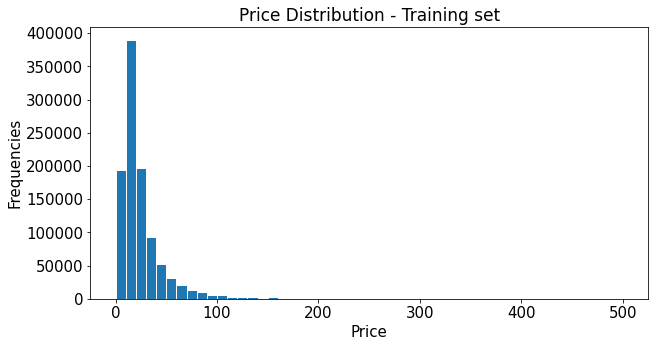

In [10]:
## visulation of distibution of price variable
train['price'].plot.hist(bins=50, figsize=(10, 5), edgecolor='white', range=[0, 500] )
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequencies', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training set', fontsize=17)
plt.show()

In [13]:
#summary of 'price' feature column
train.price.describe()

count    1.037774e+06
mean     2.673494e+01
std      3.862050e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.004000e+03
Name: price, dtype: float64

In [14]:
train['shipping'].value_counts(normalize=True)*100

## Shipping fee for 55% of items is paid by buyers

0    55.294891
1    44.705109
Name: shipping, dtype: float64

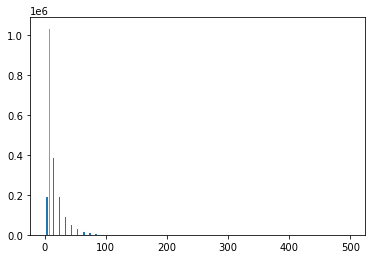

In [20]:
## Price distribution by shipping value
x, y = train['price'], train['shipping']
arr = [x, y]
plt.hist(arr, bins=50, edgecolor='white', range=[0, 500])
plt.show()

In [21]:
## To check the frequencies of item_condition_id values in data  .. Range = (1, 5) .. lower id --> better condition
train['item_condition_id'].value_counts(normalize=True, sort=False)*100

1    43.208637
2    25.300788
3    29.180053
4     2.149505
5     0.161018
Name: item_condition_id, dtype: float64

43% of items have id = 1 <br>
0.16% of items have id = 5

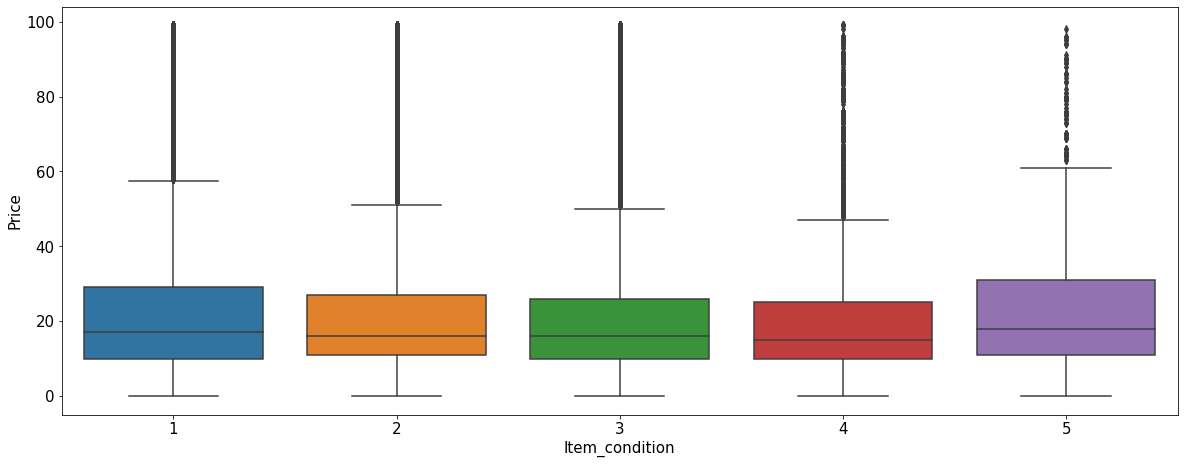

In [23]:
price_100 = train[train['price'] < 100]
fig, ax = plt.subplots(figsize=(20, 7.5))
sns.boxplot(x='item_condition_id', y='price', data=price_100, ax=ax)
plt.xlabel('Item_condition', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [24]:
len(train.category_name.unique())
## There are 1259 unique categories in 'category_name'

1259

In [25]:
(train.category_name.value_counts(normalize=True)*100).head()

Women/Athletic Apparel/Pants, Tights, Leggings    4.069124
Women/Tops & Blouses/T-Shirts                     3.142854
Beauty/Makeup/Face                                2.315191
Beauty/Makeup/Lips                                2.032433
Electronics/Video Games & Consoles/Games          1.791189
Name: category_name, dtype: float64